Esercizio 2: ML
Caricamento del dataset:
Importa il dataset Iris utilizzando from sklearn.datasets import load_iris.
Esplora brevemente i dati per capire le caratteristiche e le target.
Preprocessing dei dati:
Dividi i dati in set di addestramento e di test utilizzando train_test_split di scikit-learn (ad esempio, 70% training e 30% test).
Costruzione del modello:
Scegli un algoritmo di classificazione (ad esempio, K-Nearest Neighbors, Decision Tree, Support Vector Machine).
Addestra il modello utilizzando il set di training.
Valutazione del modello:
Predici le specie nel set di test.
Valuta le prestazioni del modello utilizzando metriche come accuratezza, precisione, richiamo e la matrice di confusione.
Visualizzazione dei risultati:
In fine crea grafici per visualizzare i risultati (ad esempio, plot della matrice di confusione).

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score
from sklearn import metrics
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

In [95]:
random_state = 42

In [96]:
iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

In [97]:
target_names,feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [98]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [99]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [101]:
model = DecisionTreeClassifier(random_state=42, max_depth=3)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [102]:
y_pred = model.predict(X_test)

In [103]:
# F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



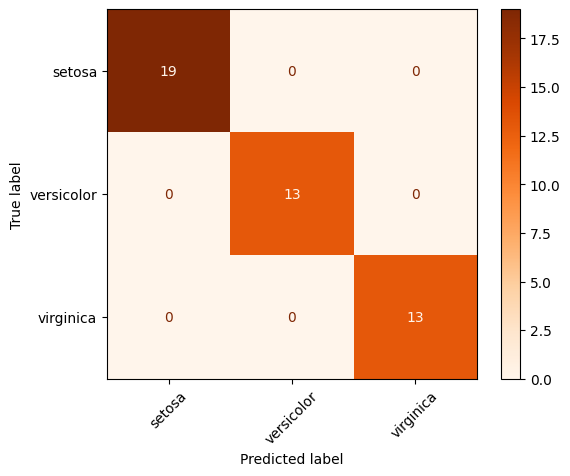

In [104]:
# plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
show_cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=target_names)
show_cm.plot(xticks_rotation=45, cmap='Oranges')